# 1 Boyutlu Isı Transferinin Modellenmesi

Batarya ve bilgisayar teknolojilerinden, evde kullandığımız ısıtma/soğutma cihazlarına kadar birçok mühendislik ürününün geliştirilmesinde ısıl analizler oldukça önemlidir. Son yıllarda uygulamalardaki geometriler karmaşıklaşmış ve numerik yöntemlere olan ihtiyaç artmıştır. Bu motivasyonla bu derste basit bir kanat kesiti üzerinden 1 boyutlu ısı transferini sonlu elemanlar metodu ile inceleyeceğiz.

## Isı Denklemi

En genel haliyle 3 boyutlu ısı denklemi

$$ \nabla \cdot k \nabla{T} +\dot{q} +\phi = \rho c_v \frac{DT}{Dt} \tag{1} $$

şeklindedir. Burada $T$ sıcaklık vektörünü, $k$ ısıl iletkenlik katsayısını, $\rho$ yoğunluğu ve $c_v$ sabit hacimde ısı kapasitesini belirtmektedir. Denklemi terim terim inceleyecek olursak:

- Sol taraftaki 1. terim ısının iletimini
- Sol taraftaki 2. terim ($\dot{q}$) aktarılan ısıyı
- Sol taraftaki 3. terim ($\phi$) viskoz etkileriden dolayı oluşan ısıl kaybı/kazancı
- Sağ taraftaki terim sıcaklığın zamana bağlı değişimini

modeller. 

### 1 Boyutlu Kanatta Isı Transferi

<img src="Resimler/Ders5/Sekil1.png" align="center" width= "600"/>

Şekil 1'de bir bilgisayar işlemcisindeki ısı transfer uygulaması gösterilmiştir. İşlemciler ısı üreten birimler olduğundan bu ısının işlemcilerden uzaklaştırılması gerekmektedir. Bunun için çeşitli uygulamalar mevcuttur. Bunlardan birisi de kanatlı geometrilerle ısı transfer yüzey alanını artırarak işlemciden atılan ısı hızını artırmaktır. Bu uygulamada kanatlardaki ısı dağılımını bilmek, kanat geometrisini ve kullanılacak malzemeyi belirlemek açısından oldukça önemlidir.

Biz bu derste sadece iletim yoluyla gerçekleşen ısı transferinin sürekli halini ele alacağız. O halde Denklem (1)'i yeniden düzenleyelim:

$$\require{cancel}$$  

$$ \nabla \cdot k \nabla{T} +\dot{q} +\cancel{\phi} = \cancel{\rho c_v \frac{DT}{Dt}} \tag{2} $$

Denklem (2)'yi kesit alanını($\dot{Q}=\dot{q}A$) içerecek şekilde düzenleyip yazarsak:

$$ \nabla \cdot kA \nabla{T} = -\dot{Q}  \tag{3} $$

şeklini alır. Şimdi Denklem (3)'ün zayıf formunu türetebiliriz.

### Zayıf Formun Türetilmesi

Denklem (3)'ü test fonksiyonu $v$ ile çarpıp kanat boyunca($\Omega$) integralini alalım:

$$ \int_0^L (\nabla \cdot (kA \nabla{T}))v d\Omega = \int_0^L (-\dot{Q})v d\Omega  \tag{4} $$

Denklem (4)'ün sol tarafı için [kısmi integrasyon](https://en.wikipedia.org/wiki/Integration_by_parts) uygulayabiliriz:

$$ \int_0^L ( -\nabla T kA  \nabla{v})d\Omega + (kA \nabla{T}v)|_0^L = \int_0^L (-\dot{Q})v d\Omega   \tag{5} $$

Tarafları düzenlersek:

$$ \int_0^L ( \nabla T kA  \nabla{v})d\Omega  = \int_0^L (\dot{Q})v d\Omega + (kA \nabla{T}v)|_0^L  \tag{5} $$


Ayrıca [Fourier'ın ısı iletim denklemini](https://en.wikipedia.org/wiki/Thermal_conduction)($q = -k \nabla{T}$)
Denklem (6)'daki sınır integralleri içindeki terim yerine yazmak için kullanabiliriz. Kanadın işlemci ile temas ettiği yerdeki iletimle ısı transfer hızı $s=-k\nabla{T}|_0$, kanadın ucundaki ısı transfer hızı $g= -k \nabla{T}|_L$ olarak belirtilirse:

$$ \int_0^L ( \nabla T kA  \nabla{v})d\Omega = \int_0^L (\dot{Q})vd\Omega +(Asv)-(Agv)  \tag{6} $$


Artık Denklem (6)'yı kanattaki sıcaklık dağılımını sonlu elemanlar yöntemiyle bulmak için kullanabiliriz. 


## Sonlu Eleman Modeli

$N$'nin baz fonksiyonu olarak tanımlanması halinde sıcaklık vektörü $T \approx \sum_{i=1}^n\mathbf{N}_i\mathbf{u}_i$, dolayısıyla sıcaklık gradyeni $\nabla T_i \approx \sum_{i=1}^n \nabla \mathbf{N}_i \mathbf{u}_i$ olacaktır. Aynı işlemi test fonksiyonu $v$ için de yaparsak $v_j \approx \sum_{j=1}^n \mathbf{N}_j\mathbf{c}_j$ ve $\nabla v_j \approx \sum_{j=1}^n \nabla \mathbf{N}_j \mathbf{c}_j$ denklemlerini elde ederiz. Kesit alanı ve ısıl iletkenlik katsayısını sabit kabul edersek ve tanımladığımız son değişkenleri tekrar denklem (6)'nın içine yazarsak:

$$ \left(\int_0^L kA( {\sum_{i=1}^n \nabla\mathbf{N}_i\mathbf{u}_i}) ({\sum_{j=1}^n \nabla \mathbf{N}_j \mathbf{c}_j})d\Omega\right) = \int_0^L \dot{Q}\sum_{j=1}^n \mathbf{N}_j\mathbf{c}_jd\Omega +(As\sum_{j=1}^n \mathbf{N}_j\mathbf{c}_j)-(Ag\sum_{j=1}^n \mathbf{N}_j\mathbf{c}_j)  \tag{7} $$

Tekrar düzenlersek:

$$ \sum_{j=1}^n \sum_{i=1}^n \mathbf{c}_j \left(\int_0^L kA( { \nabla\mathbf{N}_i}) ({ \nabla \mathbf{N}_j })d\Omega \right) \quad \mathbf{u}_i = \sum_{j=1}^n \mathbf{c}_j \left(\int_0^L \dot{Q} \mathbf{N}_j\mathbf{c}_jd\Omega +(As \mathbf{N}_j\mathbf{c}_j)-(Ag \mathbf{N}_j\mathbf{c}_j)\right)  \tag{8} $$

Denklem (8) sonlu elemanlar sistemimizi oluşturmak için gereken matrislerin ve vektörlerin denklemlerini içermektedir. Bu değişkenleri tanımlayacak olursak:

$$
\begin{align}
\mathbf{K} &=\mathbf{K}_{ji} = \sum_{j=1}^n \sum_{i=1}^n \int_0^L kA( \nabla{\mathbf{N}_i} \nabla{\mathbf{N}_j})d\Omega \tag{9} \\
\mathbf{u} &= \sum_{i=1}^n\mathbf{u}_i \tag{10} \\
\mathbf{f} &=\mathbf{f}_j = \sum_{j=1}^n \int_0^L \dot{Q}\mathbf{N}_jd\Omega +(As\mathbf{N}_j)-(Ag\mathbf{N}_j) \tag{11}
\end{align}
$$

Belirtilen matrislerle denklem sistemimizi tekrar yazarsak:

$$\mathbf{c}_j\mathbf{K}\mathbf{u} = \mathbf{c}_j \mathbf{f} $$

ya da

$$\mathbf{c}_j (\mathbf{K}\mathbf{u}-\mathbf{f}) = 0 \tag{12} $$

şeklini alır. Burada $\mathbf{c}_j$ vektörü keyfi olduğu için $\mathbf{K}\mathbf{u}-\mathbf{f}$ değeri $0$ olmalıdır. Dolayısıyla:

$$\mathbf{K}\mathbf{u} =  \mathbf{f} \tag{13} $$

ana denklem sistemini elde etmiş oluruz. Eğer bu denklem sistemini $\mathbf{u}$ vektörü için çözersek sıcaklık dağılımını numerik olarak elde edebiliriz. Ders 4'te gördüğümüz üzere lineer şekil fonksiyonlarının kullanıldığı, uzunluğu $h$ olan  bir eleman için yerel sertlik matrisini 

$$\mathbf{k}_e = \frac{kA}{h}\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix}
$$

ve yerel kuvvet vektörünü 

$$
\mathbf{f}_e = \frac{hQ}{2}\begin{bmatrix}
1\\1
\end{bmatrix} 
$$

şeklinde tanımlayabiliriz.

### Kanat Geometrisi ve Fiziksel Parametrelerin Tanımlanması

Denklemdeki parametreler için yine işleri kolaylaştırması açısından kanadın tüm fiziksel özelliklerini içeren bir mesh(ağ) sınıfı oluşturalım:

In [1]:
import numpy as np

class BirBoyutluKanat:
    def __init__(self, uzunluk, eleman_sayısı, iletkenlik, yarıçap, Q):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.k = iletkenlik
        self.r = yarıçap
        self.Q = Q
        
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS) # ağdaki noktaların koordinatları
        self.A = np.pi*self.r**2 # kesit alanı
        self.k_e = (self.k*self.A/self.h)*np.array([[1, -1], [-1, 1]]) # yerel rijitlik matrisi 
        self.f_i = self.Q*self.h*0.5*np.array([1,1]) # yerel kuvvet vektörü

### K,u ve f'nin oluşturulması

Sertlik matrisi $\mathbf{K}$'yı bir önceki derste gördüğümüz üzere yerel sertlik matrisini kullanarak kolayca oluşturabiliriz. Öncelikle parametreleri belirtelim ve yukarıdaki yazdığımız sınıfı kullanarak bir kanat geometrisi oluşturalım:

In [2]:
L = 6 #m
n_eleman = 3 
k = 5 # J/Cms
r = 1.78412411615 #m
Q = 100 #J/sm
kanat = BirBoyutluKanat(L,n_eleman,k,r,Q)
print(kanat.f_i)

[100. 100.]


Şimdi sertlik matrisini oluşturacak fonksiyonu yazıp matrisi oluşturalım:

In [3]:
def K_oluştur(mesh):
    
    K = np.zeros((mesh.NS, mesh.NS))
    
    for element in range(mesh.ES):
        K[element:element + 2, element:element + 2] += mesh.k_e
        
    return K

K0 = K_oluştur(kanat)
print(K0)

[[ 25. -25.   0.   0.]
 [-25.  50. -25.   0.]
 [  0. -25.  50. -25.]
 [  0.   0. -25.  25.]]


Şimdi de kuvvet vektörü $\mathbf{f}$'i oluşturalım:

In [4]:
def f_oluştur(mesh):
    
    f = np.zeros(mesh.NS)

    for element in range(mesh.ES):

        f[element:element + 2] += mesh.f_i
    
    return f

f0 = f_oluştur(kanat)
print(f0)

[100. 200. 200. 100.]


### Sınır Koşullarının Uygulanması

Bu örnek problemde kanadın sol ucu $0$ (C) sıcaklık değerine, sağ ucu ise $15$ (J/m2s) ısı transferi değerine sahiptir. Bu sınır koşullarını uygulamak için tıpkı 4. derste uyguladığımız gibi olabilecek tüm sınır koşulu kombinasyonlarını içeren çok genel bir denklem yazalım:

$$
\begin{equation}
\alpha \frac{dT}{dx}(x) + \beta T(x) = \gamma 
\end{equation} \tag{14}
$$

Bu denklem, $\alpha$, $\beta$ ve $\gamma$ değişkenlerini kullanarak bu problemdeki herhangi bir sınır koşulunu ifade edebilir. İlk olarak sol uçtaki sınır koşulunu yazdığımızda ($T(0)=0$):

$$
\begin{equation}
\alpha_0 \frac{dT}{dx}(0) + \beta_0 T(0) = \gamma_0 \rightarrow  T(0) = 0
\end{equation}
$$

burada $\alpha_0=0$, $\beta_0=1$ ve $\gamma_0=0$ oldu. Şimdi denklem (14)'ü sağ uçtaki sınır koşulu için yazarsak:

$$
\begin{equation}
\alpha_1 \frac{dT}{dx}(L) + \beta_1 T(L) = \gamma_1 \rightarrow  -5 \frac{dT}{dx}(L) = 15 \quad (J/{m^2s})
\end{equation}
$$

burada ise $\alpha_1=-5$, $\beta_1=0$ ve $\gamma_1=15$ oldu. Bu sınır koşullarını uygulamak için türetilen denklemleri içerecek şekilde $\mathbf{K}$ matrisini ve $\mathbf{f}$ vektörünü tekrar gözden geçirmek gerekmektedir:

#### K Matrisi

Sıcaklık değeri $x=0$ noktasında 0 idi. Bu şartı matrisin ilk satırı ve ilk sütununundaki elemanı üzerinde değişiklik yaparak elde edebiliriz.  

Diğer uçta ($x=L$) ise ısı transfer sınır koşulunu ($-k\frac{dT}{dx}=g$),  matrisin son satırı ve son sütunundaki eleman üzerinde değişiklik yaparak uygulayabiliriz. 

#### f vektörü

$\mathbf{K}$ matrisininde yaptığımız değişiklere benzere şekilde $\mathbf{f}$ vektörünün de ilk ve son elemanlarını kullanarak sınır koşullarını uygulayabiliriz.

$\mathbf{K}$ matrisi ve $\mathbf{f}$ vektörünün değiştirilmesi ile ilgili detaylı bilgi için Becker'in kitabında 80. sayfaya göz atabilirsiniz[1]. 

Şimdi bu operasyonları yapan fonksiyonu yazalım:

In [5]:
alpha = [0,-5]
beta  = [1, 0]
gamma = [0, 15]

def sınır_uygula(mesh,K0,f0,alpha,beta,gamma):
    
    K_ = K0.copy()
    f_ = f0.copy()
    for i in range(2):
        # ilk ve son elemana ulaşmak için kullanılan indis
        indis=-1*i 
        if alpha[i] == 0:
            # 0'a bölerken nümerik problemlerle karşılaşmamak
            # için çok küçük bir sayı kullanabiliriz.
            alpha_=10e-12
        else:
            alpha_=alpha[i]
            
        K_[indis,indis]+= (-1)**(i+1)*beta[i]*mesh.k*mesh.A/alpha_  
        f_[indis] += (-1)**(i+1)*gamma[i]*mesh.k*mesh.A/alpha_

    return K_,f_

K,f = sınır_uygula(kanat,K0,f0,alpha,beta,gamma)

Artık denklem sistemimizi çözebiliriz.

### Denklem Sisteminin Çözülmesi

Sıcaklık vektörünü elde etmek için gerekli olan $\mathbf{K}$ matrisini ve $\mathbf{f}$ vektörünü yukarıda elde ettik. Artık bunları kullanarak sıcaklık değerlerini elde edebiliriz:

In [6]:
from scipy.linalg import solve
u = solve(K,f)
print(u)

[-9.0e-11  1.4e+01  2.0e+01  1.8e+01]


Yukarıdaki problemin analitik çözümü, sınır koşullarını ve ana denklem (3)'ü sağlayan  2.dereceden bir polinom ile elde edilebilir. Bu polinom:
$$T(x) = -x^2+9x $$
olabilir. Bu analitik çözüm denklem (3)'te yerine konulduğunda, sınır koşulları dahil tüm sistemi sağlayacaktır. Öncelikle bu analitik çözüm için bir dizi oluşturalım: 

In [7]:
x_analitik = np.linspace(0,kanat.L,100)
u_analitik = -x_analitik**2+9*x_analitik

Şimdi sonlu elemanlar metodu ile elde ettiğimiz çözüm ile analitik çözümü kıyaslayalım:

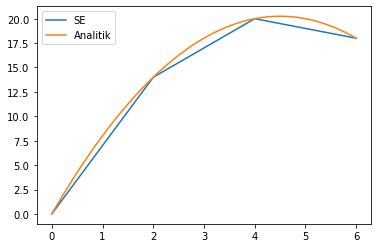

In [8]:
import matplotlib.pyplot as plt

plt.plot(kanat.koordinatlar,u,label='SE')
plt.plot(x_analitik,u_analitik,label='Analitik')
plt.legend()

Görüldüğü üzere sonlu elemanlar yöntemi ile elde ettiğimiz numerik çözüm, analitik çözümle uyum içindedir. Bu sonucu daha fazla eleman kullanarak iyileştirmek mümkündür.

### Çözücüyü Geliştirme

Daha kullanışlı ve kompakt bir kod yapısı için tüm matris-vektör oluşturma fonksiyonlarımızı ve sınır koşulu parametrelerinizi tek bir fonksiyon içine alalım:

In [9]:
def çözücü(mesh,alpha,beta,gamma):
    
    K0 = K_oluştur(mesh)
    f0 = f_oluştur(mesh)
    K,f = sınır_uygula(mesh,K0,f0,alpha,beta,gamma)
    
    u = solve(K,f)
    
    return u

Şimdi daha çok elemana sahip bir ağ için problemimizi tekrar çözelim:

In [10]:
n_eleman2 = 8
kanat2 = BirBoyutluKanat(L,n_eleman2,k,r,Q)

u2 = çözücü(kanat2,alpha,beta,gamma)
u2

array([-9.00000e-11,  6.18750e+00,  1.12500e+01,  1.51875e+01,
        1.80000e+01,  1.96875e+01,  2.02500e+01,  1.96875e+01,
        1.80000e+01])

Sonuçları grafikte tekrar gösterelim:

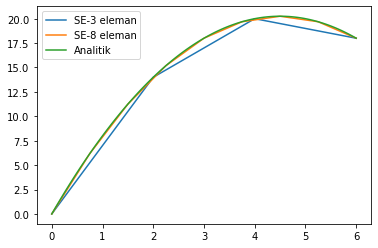

In [11]:
plt.plot(kanat.koordinatlar,u,label='SE-{} eleman'.format(n_eleman))
plt.plot(kanat2.koordinatlar,u2,label='SE-{} eleman'.format(n_eleman2))
plt.plot(x_analitik,u_analitik,label='Analitik')
plt.legend()

### Referanslar
[1] Becker, E. B., Carey, G. F., & Oden, J. T. (1981). Finite Elements, An Introduction: Volume I. ., 258, 1981.